# 7. 데이터 정제 및 준비
---



In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)


In [ ]:
data = pd.DataFrame([np.arange(9), np.arange(9)])

data
data

,0,1,2,3,4,5,6,7,8
0,0,1,2,3,4,5,6,7,8
1,0,1,2,3,4,5,6,7,8


,0,1,2,3,4,5,6,7,8
0,0,1,2,3,4,5,6,7,8
1,0,1,2,3,4,5,6,7,8


## 7.1 누락된 데이터 처리하기

* pandas 객체의 모든 기술 통계는 누락된 데이터를 배제하고 처리한다.
* 산술 데이터에 한해 pandas는 누락된 데이터를 실숫값인 Nan으로 취급한다.
* 누락된 데이터 골라 내기, 삭제 하기, 채우기.

In [ ]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data
print('\n')
string_data.isnull()

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

0    False
1    False
2     True
3    False
dtype: bool

In [ ]:
string_data[0] = None # 파이썬 내장 None 값 또한 Na 값으로 취급된다.
string_data.isnull() # <-> notnull()
print('\n')
string_data.notnull()

0     True
1    False
2     True
3    False
dtype: bool

0    False
1     True
2    False
3     True
dtype: bool

In [ ]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, NA, 3.]])

data.isnull()

data.isna()

,0,1,2
0,False,False,False
1,False,True,True
2,True,True,True
3,True,True,False


,0,1,2
0,False,False,False
1,False,True,True
2,True,True,True
3,True,True,False


### 7.1.1 누락된 데이터 골라내기

> DataFrame의 경우 기본적으로 NA 값을 하나라도 포함하고 있으면 로우를 제외시킨다.             
> [pandas.DataFrame.dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

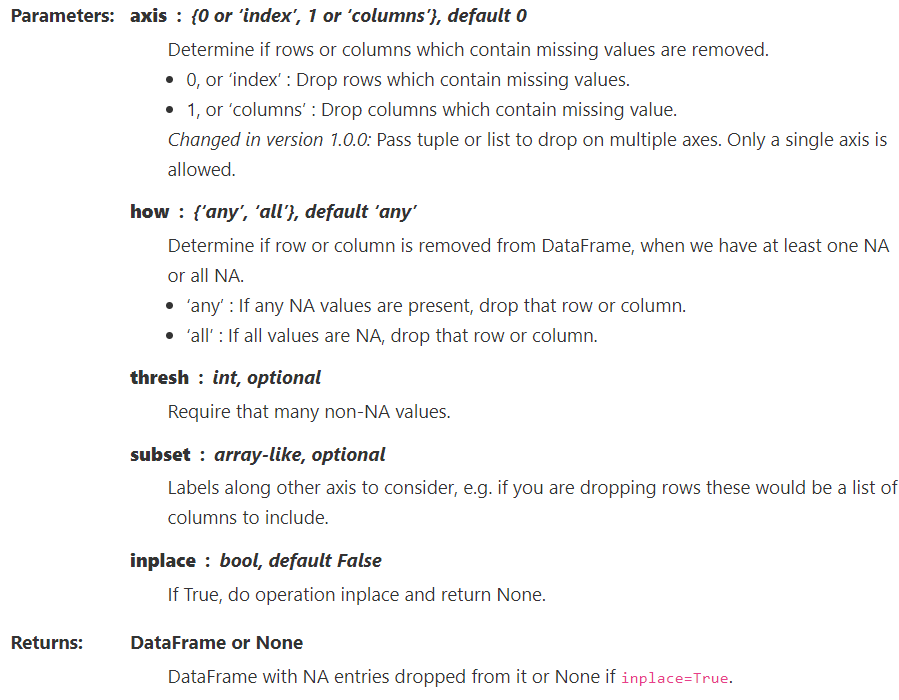


In [ ]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
data
print("\n")
data.dropna()

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

0    1.0
2    3.5
4    7.0
dtype: float64

In [ ]:
data.notnull()
print("\n")
data[data.notnull()]

0     True
1    False
2     True
3    False
4     True
dtype: bool

0    1.0
2    3.5
4    7.0
dtype: float64

In [ ]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, NA, 3.]])
cleaned = data.dropna() #defalut는 how=any axis=0
data
cleaned

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,3.0


,0,1,2
0,1.0,6.5,3.0


In [ ]:
data.dropna(how='all') # 

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,NaN,3.0


In [ ]:
data[4] = NA
data
data.dropna(axis=1, how='all')

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,3.0,NaN


,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,3.0


> 몇 개 이상의 값이 들어 있는 로우만 살펴보고 싶다면 thresh 인자에 원하는 값을 넘기면 된다.

In [ ]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df
df.dropna(thresh=2) # 값이 들어있는(결측치가 아닌) 갯수가 2개 이상
df.dropna(subset=[1], axis=1) # subset은 컬럼을 지정해 NA값이 포함되어 있는 로우(또는 컬럼)을 삭제한다. 

,0,1,2
0,-1.409402,NaN,NaN
1,0.103614,NaN,NaN
2,2.613999,NaN,-0.751653
3,0.636281,NaN,0.614680
4,1.021391,0.668272,-0.809535
5,-0.908125,1.512289,0.095117
6,1.184669,0.637033,-0.539275


,0,1,2
2,2.613999,NaN,-0.751653
3,0.636281,NaN,0.614680
4,1.021391,0.668272,-0.809535
5,-0.908125,1.512289,0.095117
6,1.184669,0.637033,-0.539275


,0
0,-1.409402
1,0.103614
2,2.613999
3,0.636281
4,1.021391
5,-0.908125
6,1.184669


### 7.1.2 결측치 채우기

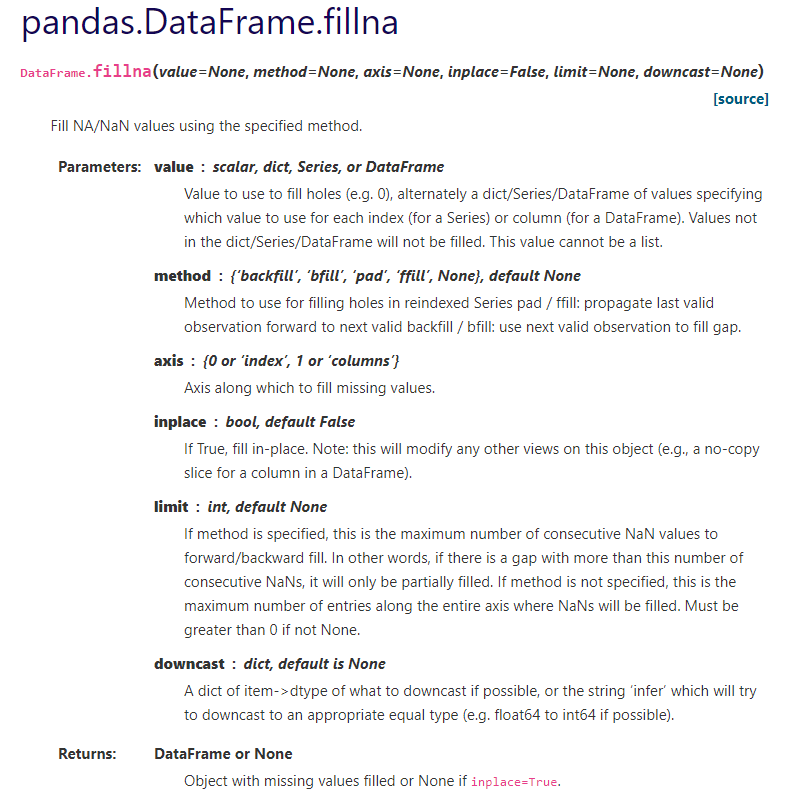

[padnas.DataFrame.fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

In [ ]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df
df.fillna(0)

,0,1,2
0,0.476985,NaN,NaN
1,-0.577087,NaN,NaN
2,0.523772,NaN,1.343810
3,-0.713544,NaN,-2.370232
4,-1.860761,-0.860757,0.560145
5,-1.265934,0.119827,-1.063512
6,0.332883,-2.359419,-0.199543


,0,1,2
0,0.476985,0.000000,0.000000
1,-0.577087,0.000000,0.000000
2,0.523772,0.000000,1.343810
3,-0.713544,0.000000,-2.370232
4,-1.860761,-0.860757,0.560145
5,-1.265934,0.119827,-1.063512
6,0.332883,-2.359419,-0.199543


> fillna에 사전값을 넘겨서 각 컬럼마다 다른 값을 채울 수도 있다.



In [ ]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,0.476985,0.500000,0.000000
1,-0.577087,0.500000,0.000000
2,0.523772,0.500000,1.343810
3,-0.713544,0.500000,-2.370232
4,-1.860761,-0.860757,0.560145
5,-1.265934,0.119827,-1.063512
6,0.332883,-2.359419,-0.199543


In [ ]:
df
df.fillna(0, inplace=True) # 기존 객체를 변경할 수도 있다.
df

,0,1,2
0,-1.409402,NaN,NaN
1,0.103614,NaN,NaN
2,2.613999,NaN,-0.751653
3,0.636281,NaN,0.614680
4,1.021391,0.668272,-0.809535
5,-0.908125,1.512289,0.095117
6,1.184669,0.637033,-0.539275


,0,1,2
0,-1.409402,0.000000,0.000000
1,0.103614,0.000000,0.000000
2,2.613999,0.000000,-0.751653
3,0.636281,0.000000,0.614680
4,1.021391,0.668272,-0.809535
5,-0.908125,1.512289,0.095117
6,1.184669,0.637033,-0.539275


In [ ]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df
df.fillna(method='ffill', axis=0)
df.fillna(method='ffill', limit=2)

,0,1,2
0,-1.610841,-1.026621,1.241573
1,-0.156760,-2.449096,-1.033948
2,1.599534,NaN,0.151326
3,-0.542173,NaN,0.106403
4,-1.308228,NaN,NaN
5,-0.190481,NaN,NaN


,0,1,2
0,-1.610841,-1.026621,1.241573
1,-0.156760,-2.449096,-1.033948
2,1.599534,-2.449096,0.151326
3,-0.542173,-2.449096,0.106403
4,-1.308228,-2.449096,0.106403
5,-0.190481,-2.449096,0.106403


,0,1,2
0,-1.610841,-1.026621,1.241573
1,-0.156760,-2.449096,-1.033948
2,1.599534,-2.449096,0.151326
3,-0.542173,-2.449096,0.106403
4,-1.308228,NaN,0.106403
5,-0.190481,NaN,0.106403


> fillna를 이용해서 매우 다양한 일을 할 수 있는데 예를 들어 Series의 평균값이나 중간값을 전달할 수도 있다.

In [ ]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

In [ ]:
df = pd.DataFrame(
                {'a' : [4, 5, 6],
                 'b' : [7, NA, 9],
                 'c' : [10, 11, 12],
                 'd' : [13, 14, NA]},
                )

df
df.dtypes
print("\n")
df = df.fillna(0.1, downcast='infer')
df
df.dtypes

,a,b,c,d
0,4,7.0,10,13.0
1,5,NaN,11,14.0
2,6,9.0,12,NaN


a      int64
b    float64
c      int64
d    float64
dtype: object

,a,b,c,d
0,4,7.0,10,13.0
1,5,0.1,11,14.0
2,6,9.0,12,0.1


a      int64
b    float64
c      int64
d    float64
dtype: object

## Conclusion